In [1]:
from matplotlib import _preprocess_data
import numpy as np
import streamlit as st
from streamlit_option_menu import option_menu
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans

In [2]:


# Specify the path to your CSV file
file_path = r'C:\Users\Hp\Desktop\final  project\classification_data.csv'  # Replace with the actual path of your file

# Read the CSV file
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
data.head()


,count_session,count_hit,channelGrouping,totals_newVisits,device_browser,device_operatingSystem,device_isMobile,device_deviceCategory,geoNetwork_region,geoNetwork_latitude,...,latest_keyword,earliest_isTrueDirect,latest_isTrueDirect,num_interactions,bounces,time_on_site,transactionRevenue,products_array,has_converted,target_date
0,9,1194,(Other),0,GoogleAnalytics,Android,True,mobile,Sharjah,25.3463,...,(not set),True,True,1900,0,5617,0,food////food////food,0,2021-01-01
1,9,1194,(Other),0,GoogleAnalytics,Android,True,mobile,Sharjah,25.3463,...,(not set),True,True,1900,0,5617,0,food////food////food,0,2021-01-01
2,28,1816,Paid Search,0,GoogleAnalytics,Android,True,mobile,Ajman,25.4052,...,(automatic matching),True,True,3843,0,77417,1477195214,"(not set)////baby_products--milk,_food_&_juice...",1,2021-01-01
3,2,299,Paid Search,0,GoogleAnalytics,Android,True,mobile,Abu Dhabi,24.4539,...,custom0==marketplace&+id==*,True,True,592,0,1576,0,food////food,0,2021-01-01
4,2,299,Paid Search,0,GoogleAnalytics,Android,True,mobile,Abu Dhabi,24.4539,...,custom0==marketplace&+id==*,True,True,592,0,1576,0,food////food,0,2021-01-01


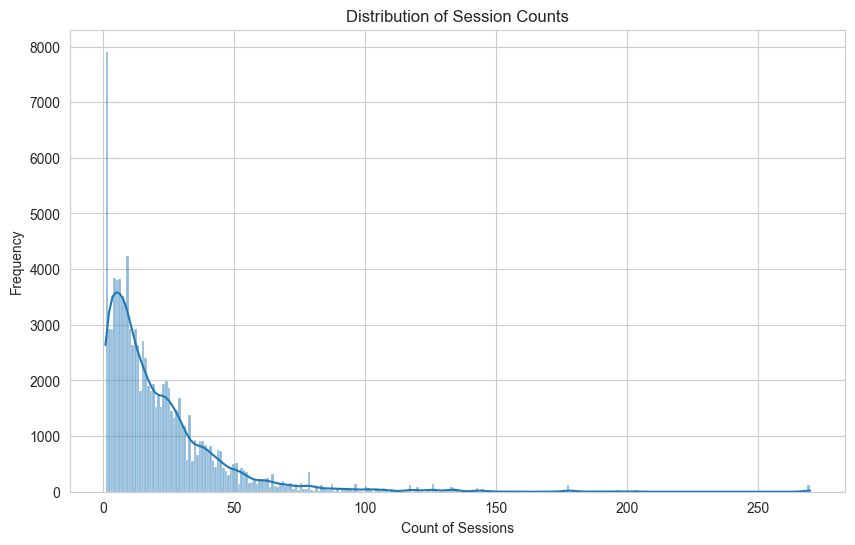

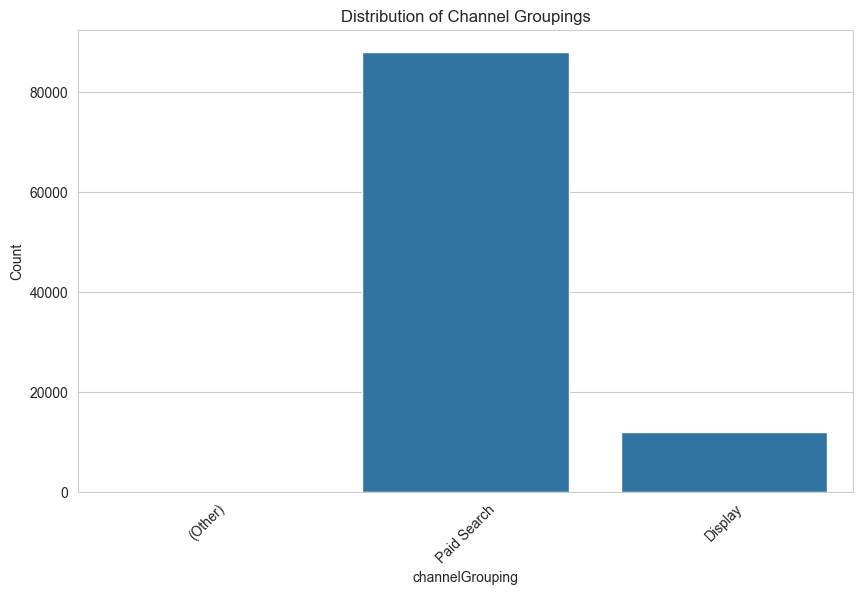

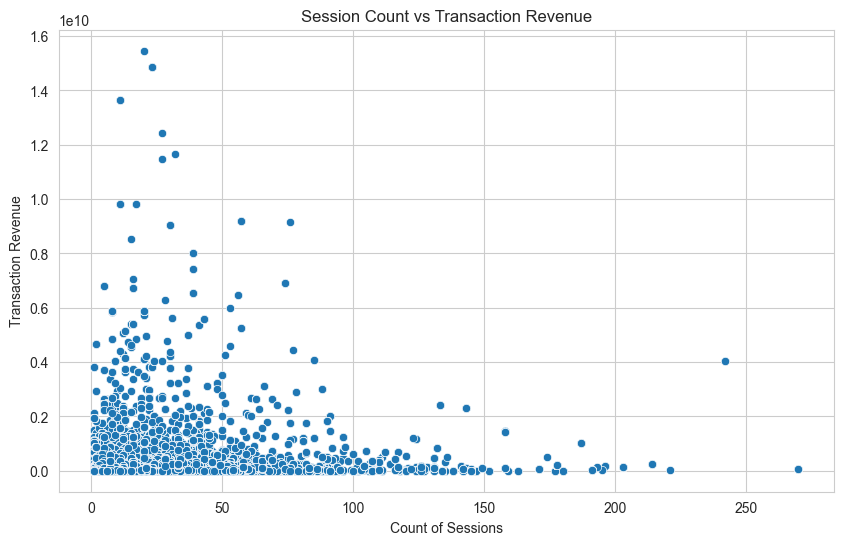

In [3]:


# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting a histogram of a numeric variable
plt.figure(figsize=(10, 6))
sns.histplot(data['count_session'], kde=True)
plt.title('Distribution of Session Counts')
plt.xlabel('Count of Sessions')
plt.ylabel('Frequency')
plt.show()

# Plotting a bar chart for a categorical variable
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='channelGrouping')
plt.title('Distribution of Channel Groupings')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

# Plotting a scatter plot to observe relationship between two numerical variables
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['count_session'], y=data['transactionRevenue'])
plt.title('Session Count vs Transaction Revenue')
plt.xlabel('Count of Sessions')
plt.ylabel('Transaction Revenue')
plt.show()


In [4]:
#steps for Preprocessing

# Load the dataset
file_path = r'C:\Users\Hp\Desktop\final  project\classification_data.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Handling missing values
data.ffill(inplace=True)

# Selecting features and target
X = data.drop('has_converted', axis=1)
y = data['has_converted']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identifying categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Creating a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Applying the preprocessing pipeline to the dataset
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)


       count_session      count_hit  totals_newVisits  geoNetwork_latitude  \
count  100000.000000  100000.000000     100000.000000        100000.000000   
mean       21.532440    3671.722790          0.020380            24.918526   
std        24.002385    4627.338737          0.141297             3.352055   
min         1.000000       2.000000          0.000000           -33.924900   
25%         6.000000     971.000000          0.000000            24.453900   
50%        15.000000    2209.000000          0.000000            25.204800   
75%        29.000000    4812.000000          0.000000            25.204800   
max       270.000000   48744.000000          1.000000            59.329300   

       geoNetwork_longitude  historic_session  historic_session_page  \
count         100000.000000     100000.000000          100000.000000   
mean              54.274882       9692.262300            1875.326010   
std                7.911686      12891.629368            5222.527517   
min      

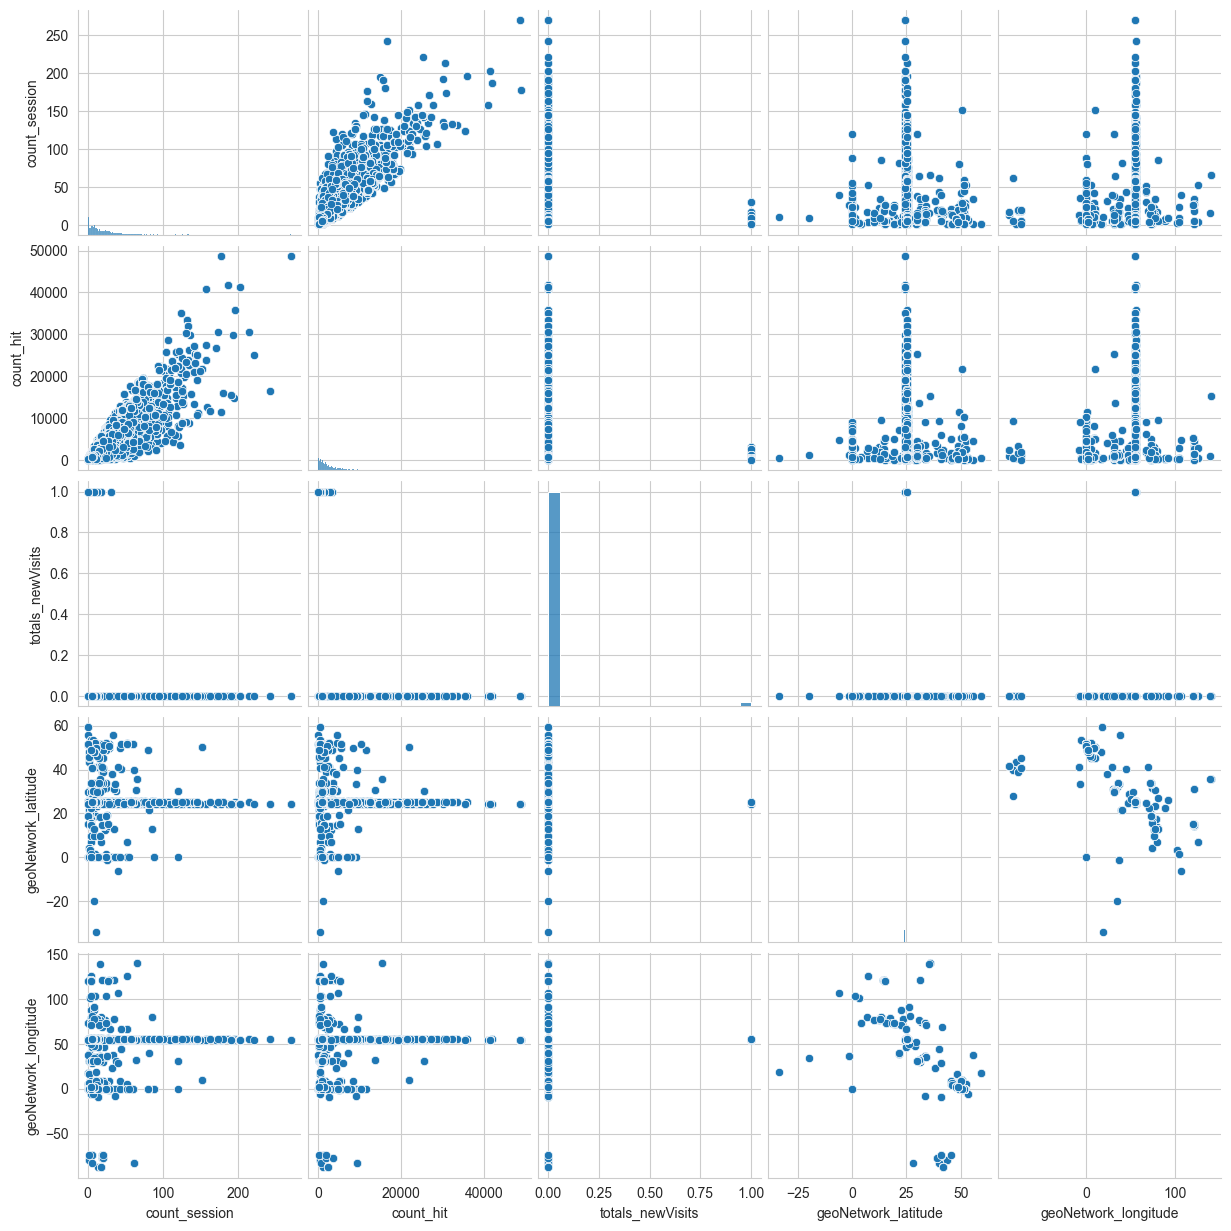

In [5]:
#steps for Stat Analysis

# Load the dataset
file_path = r'C:\Users\Hp\Desktop\final  project\classification_data.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Handling missing values with forward fill method
data.ffill(inplace=True)

# Selecting only numeric columns for statistical analysis
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# 1. Descriptive Statistics
descriptive_stats = numeric_data.describe()

# 2. Correlation Matrix
correlation_matrix = numeric_data.corr()

# 3. Pairplot for a few selected numeric columns (as an example)
# Selecting a subset of numeric columns for pairplot
selected_columns = numeric_data.columns[:5]  # Adjust the number as needed
sns.pairplot(numeric_data[selected_columns])

# 4. T-Test Example (if applicable)
# If you have specific groups to compare, you can perform a T-test

# Output
print(descriptive_stats)
print(correlation_matrix)



In [6]:
# steps for Feature Selection
from sklearn.feature_selection import SelectKBest, f_classif

# Assuming X_train_preprocessed and y_train are already defined
k = 10
selector = SelectKBest(f_classif, k=k)
X_train_selected = selector.fit_transform(X_train_preprocessed, y_train)

# Get the mask of selected features
selected_features_mask = selector.get_support()

# Get feature names for numerical columns directly
num_feature_names = numerical_cols.tolist()

# Get feature names for categorical columns from the one-hot encoder
cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols).tolist()

# Combine all feature names
all_feature_names = num_feature_names + cat_feature_names

# Mapping the selected features back to their original names
selected_feature_names = [all_feature_names[i] for i in range(len(all_feature_names)) if selected_features_mask[i]]

selected_feature_names



c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0 0 0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


['count_hit',
 'avg_session_time',
 'single_page_rate',
 'sessionQualityDim',
 'num_interactions',
 'transactionRevenue',
 'device_operatingSystem_Android',
 'device_operatingSystem_iOS',
 'earliest_source_mobile',
 'products_array_food']

In [7]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Let's use a different numeric column for regression
# Replace 'numeric_target' with your actual numeric column for regression
numeric_target = 'some_numeric_column'

# Ensure the column exists in the dataset
if numeric_target in data.columns:
    # Preparing data for RandomForestRegressor
    X_reg = data.drop([numeric_target], axis=1)
    y_reg = data[numeric_target]

    # Splitting the data
    X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

    # Preprocessing
    preprocessor_reg = ColumnTransformer(transformers=[
        ('num', StandardScaler(), X_reg.select_dtypes(include=['int64', 'float64']).columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), X_reg.select_dtypes(include=['object', 'bool']).columns)
    ])
    X_train_reg_preprocessed = preprocessor_reg.fit_transform(X_train_reg)
    X_test_reg_preprocessed = preprocessor_reg.transform(X_test_reg)

    # RandomForestRegressor
    rf_regressor = RandomForestRegressor()
    rf_regressor.fit(X_train_reg_preprocessed, y_train_reg)
    y_pred_reg = rf_regressor.predict(X_test_reg_preprocessed)
    mse_rf_reg = mean_squared_error(y_test_reg, y_pred_reg)
else:
    mse_rf_reg = "Numeric target column not found in dataset"

# Preparing data for RandomForestClassifier and KMeans
# Assuming 'has_converted' is the target for classification
X_class = data.drop(['has_converted'], axis=1)
y_class = data['has_converted']

# Splitting the data
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Preprocessing
preprocessor_class = ColumnTransformer(transformers=[
    ('num', StandardScaler(), X_class.select_dtypes(include=['int64', 'float64']).columns),
    ('cat', OneHotEncoder(handle_unknown='ignore'), X_class.select_dtypes(include=['object', 'bool']).columns)
])
X_train_class_preprocessed = preprocessor_class.fit_transform(X_train_class)
X_test_class_preprocessed = preprocessor_class.transform(X_test_class)

# RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_class_preprocessed, y_train_class)
y_pred_class = rf_classifier.predict(X_test_class_preprocessed)
accuracy_rf_class = accuracy_score(y_test_class, y_pred_class)

# KMeans Clustering
kmeans = KMeans(n_clusters=3)  # Number of clusters
kmeans.fit(X_train_class_preprocessed)
clusters = kmeans.predict(X_test_class_preprocessed)

accuracy_rf_class, mse_rf_reg, clusters


(0.9968,
 'Numeric target column not found in dataset',
 array([2, 2, 2, ..., 1, 2, 2]))

In [8]:
from sklearn.metrics import classification_report

# RandomForestClassifier metrics
class_report_rf = classification_report(y_test_class, y_pred_class)
print("RandomForestClassifier Metrics:\n", class_report_rf)


RandomForestClassifier Metrics:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      9693
           1       1.00      0.99      1.00     10307

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Mean Squared Error: 4.9146811578865656e+16
Root Mean Squared Error: 221690801.74618354
R-squared: 0.8368426436741544


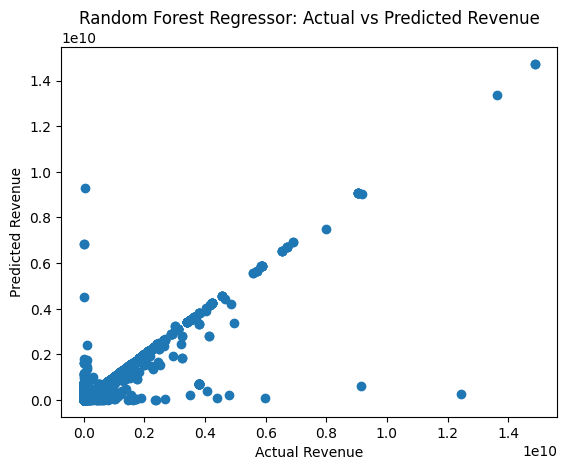

In [8]:


# Load dataset
data = pd.read_csv(r'C:\Users\Hp\Desktop\final  project\classification_data.csv')  # Replace with your file path
data = data.dropna()

# Preprocessing
categorical_features = ['channelGrouping', 'device_browser', 'geoNetwork_region']
numerical_features = ['count_session', 'count_hit']

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Define target and features
y = data['transactionRevenue']  
X = data.drop(['has_converted', 'transactionRevenue'], axis=1)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
regressor = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

# Fit and predict
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")


# Plot
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Random Forest Regressor: Actual vs Predicted Revenue')
plt.show()


In [10]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import silhouette_score

# Load your dataset
# data = pd.read_csv('C:\Users\Hp\Desktop\final  project\classification_data.csv')

# Dropping non-numeric columns for simplicity (you can also encode them)
X = data.select_dtypes(include=[np.number])

# Scaling the numerical data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Creating the KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)  # You can choose the number of clusters

# Fitting the model
kmeans.fit(X_scaled)

# Predicting clusters
clusters = kmeans.predict(X_scaled)

# Evaluating the model using Silhouette Score
silhouette_avg = silhouette_score(X_scaled, clusters)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.3779256767954399
